In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from google.colab import files

import re
import csv
import pandas as pd
import numpy as np

1.1 - Bạn hãy viết code cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương ứng (kq.txt) và mô tả ngắn gọn về cấu trúc của trang Web trên? 

In [2]:
url = 'https://quotes.toscrape.com/'
page=urlopen(url)
myfile=page.read()
html = myfile.decode("utf-8")

kq= open('kq.txt', 'w')
kq.write(html)
kq = open("kq.txt", "r")
files.download('kq.txt')






<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.2 - Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:

a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến
'result’, hiển thị giá trị biến 'result’ ra màn hình? (5 điểm)

In [3]:
soup=BeautifulSoup(html, "html.parser")
result=soup.find_all("div", class_="quote")
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

b. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author" và in kết quả ra màn hình? (5 điểm)


In [4]:
for r in result:
  a=r.find_all('small', class_="author")
  for author in a:
    print(author.next)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


c.	Hãy viến hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in ra màn hình các nội dung (Tên tác giả, Đường link của tác giả, Ngày tháng năm sinh, Và câu nói nổi tiếng của tác giả)? (15 điểm)

In [5]:

dsQuote=[]
def tacgiaLink():
  for q in result:
    quote=[]
    name=q.find("small", class_="author")
    # print(name.next)
    quote.append(name.next)
    a=q.find("a")
    href=a.get('href')
    url2 = ''.join(['https://quotes.toscrape.com', href,'/'])
    quote.append(url2)
    # print(url2)
    page2=urlopen(url2)
    myfile2=page2.read()
    html_author = myfile2.decode("utf-8")
    # print(html_author)
    soup2=BeautifulSoup(html_author, "html.parser")
    date=soup2.find("span", class_="author-born-date")
    # print(len(date.next.strip(' ')))
    quote.append(date.next.strip(' '))
    qu=q.find("span", class_="text")
    # print(qu.next.strip('“”'))
    quote.append(qu.next.strip('“”'))
    # print("---------------------------")
    dsQuote.append(quote)

tacgiaLink()
for au in dsQuote:
  print("Tên tác giả: ", au[0])
  print("Đường link: ", au[1])
  print("Ngày tháng năm sinh: ", au[2])
  print("Câu nói nổi tiếng: ", au[3])
  print("\n")


Tên tác giả:  Albert Einstein
Đường link:  https://quotes.toscrape.com/author/Albert-Einstein/
Ngày tháng năm sinh:  March 14, 1879
Câu nói nổi tiếng:  The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.


Tên tác giả:  J.K. Rowling
Đường link:  https://quotes.toscrape.com/author/J-K-Rowling/
Ngày tháng năm sinh:  July 31, 1965
Câu nói nổi tiếng:  It is our choices, Harry, that show what we truly are, far more than our abilities.


Tên tác giả:  Albert Einstein
Đường link:  https://quotes.toscrape.com/author/Albert-Einstein/
Ngày tháng năm sinh:  March 14, 1879
Câu nói nổi tiếng:  There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.


Tên tác giả:  Jane Austen
Đường link:  https://quotes.toscrape.com/author/Jane-Austen/
Ngày tháng năm sinh:  December 16, 1775
Câu nói nổi tiếng:  The person, be it gentleman or lady, who has not pleasure in a good nov

d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1 dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang web trên một cách tự động theo code của các ý trên? (5 điểm)


In [6]:
def tacgiaLinkThuN(n):
  url= "https://quotes.toscrape.com/page/"+str(n)+"/"
  page=urlopen(url)
  myfile=page.read()
  html = myfile.decode("utf-8")
  soup=BeautifulSoup(html, "html.parser")
  result=soup.find_all("div", class_="quote")
  for q in result:
    quote=[]
    name=q.find("small", class_="author")
    # print(name.next)
    quote.append(name.next)
    a=q.find("a")
    href=a.get('href')
    url2 = ''.join(['https://quotes.toscrape.com', href,'/'])
    quote.append(url2)
    # print(url2)
    page2=urlopen(url2)
    myfile2=page2.read()
    html_author = myfile2.decode("utf-8")
    # print(html_author)
    soup2=BeautifulSoup(html_author, "html.parser")
    date=soup2.find("span", class_="author-born-date")
    # print(len(date.next.strip(' ')))
    quote.append(date.next.strip(' '))
    qu=q.find("span", class_="text")
    # print(qu.next.strip('“”'))
    quote.append(qu.next.strip('“”'))
    # print("---------------------------")
    dsQuote.append(quote)

for i in range(2,7):
  tacgiaLinkThuN(i)

with open("Quote.csv", "w", newline="") as f:
  writer = csv.writer(f)
  writer.writerows([['Tacgia', 'Link', 'Namsinh', 'Quote']])
  writer.writerows(dsQuote)

files.download('Quote.csv')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.1. Xử lý dữ liệu- Data Imputation (5 điểm):



In [7]:
file_name = 'Quote.csv'
df = pd.read_csv(file_name)
df


,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",The world as we have created it is a process o...
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling/,"July 31, 1965","It is our choices, Harry, that show what we tr..."
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",There are only two ways to live your life. One...
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen/,"December 16, 1775","The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Mon...,"June 01, 1926","Imperfection is beauty, madness is genius and ..."
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",Try not to become a man of success. Rather bec...
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide/,"November 22, 1869",It is better to be hated for what you are than...
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,"February 11, 1847","I have not failed. I've just found 10,000 ways..."
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,"October 11, 1884",A woman is like a tea bag; you never know how ...
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin/,"August 14, 1945","A day without sunshine is like, you know, night."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tacgia   60 non-null     object
 1   Link     60 non-null     object
 2   Namsinh  60 non-null     object
 3   Quote    60 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


In [9]:
df['Namsinh'] = pd.to_datetime(df['Namsinh'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tacgia   60 non-null     object        
 1   Link     60 non-null     object        
 2   Namsinh  60 non-null     datetime64[ns]
 3   Quote    60 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.0+ KB


In [10]:
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,The world as we have created it is a process o...
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling/,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,There are only two ways to live your life. One...
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen/,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Mon...,1926-06-01,"Imperfection is beauty, madness is genius and ..."
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,Try not to become a man of success. Rather bec...
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide/,1869-11-22,It is better to be hated for what you are than...
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,1847-02-11,"I have not failed. I've just found 10,000 ways..."
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,1884-10-11,A woman is like a tea bag; you never know how ...
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin/,1945-08-14,"A day without sunshine is like, you know, night."


- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?

In [11]:
count_NaN=0
def checkNaN(a):
  for i in a:
    if i == 'NaN':
      count_NaN += 1

checkNaN(df['Namsinh'])
print(count_NaN)

0


In [12]:
df['Namsinh'].fillna(0)

0    1879-03-14
1    1965-07-31
2    1879-03-14
3    1775-12-16
4    1926-06-01
5    1879-03-14
6    1869-11-22
7    1847-02-11
8    1884-10-11
9    1945-08-14
10   1926-06-01
11   1965-07-31
12   1879-03-14
13   1945-02-06
14   1904-03-02
15   1952-03-11
16   1928-09-30
17   1844-10-15
18   1835-11-30
19   1899-04-24
20   1904-07-12
21   1803-05-25
22   1910-08-26
23   1942-08-07
24   1936-09-24
25   1904-03-02
26   1879-03-14
27   1965-07-31
28   1879-03-14
29   1945-02-06
30   1904-03-02
31   1965-07-31
32   1945-02-06
33   1910-08-26
34   1965-07-31
35   1922-11-26
36   1948-01-12
37   1879-03-14
38   1899-08-24
39   1819-11-22
40   1948-09-20
41   1898-11-29
42   1926-06-01
43   1926-06-01
44   1879-03-14
45   1926-06-01
46   1926-06-01
47   1929-01-15
48   1965-07-31
49   1924-08-02
50   1775-12-16
51   1884-10-11
52   1926-06-01
53   1879-03-14
54   1949-01-12
55   1824-07-27
56   1973-12-24
57   1899-07-21
58   1880-06-27
59   1856-07-26
Name: Namsinh, dtype: datetime64[ns]

In [13]:
import datetime
now = datetime.datetime.now()
for i in range(len(df['Namsinh'])):
  if (df['Namsinh'][i] == 0):
    df['Namsinh'][i] = now

df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,The world as we have created it is a process o...
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling/,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,There are only two ways to live your life. One...
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen/,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Mon...,1926-06-01,"Imperfection is beauty, madness is genius and ..."
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,Try not to become a man of success. Rather bec...
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide/,1869-11-22,It is better to be hated for what you are than...
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,1847-02-11,"I have not failed. I've just found 10,000 ways..."
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,1884-10-11,A woman is like a tea bag; you never know how ...
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin/,1945-08-14,"A day without sunshine is like, you know, night."


- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?

In [14]:
import datetime
tuoi=[]
now = datetime.datetime.now().year
for i in range(len(df['Namsinh'])):
  tuoi.append(now-df['Namsinh'][i].year)

print(tuoi)


[142, 56, 142, 246, 95, 142, 152, 174, 137, 76, 95, 56, 142, 76, 117, 69, 93, 177, 186, 122, 117, 218, 111, 79, 85, 117, 142, 56, 142, 76, 117, 56, 76, 111, 56, 99, 73, 142, 122, 202, 73, 123, 95, 95, 142, 95, 95, 92, 56, 97, 246, 137, 95, 142, 72, 197, 48, 122, 141, 165]


In [15]:
df['Tuoi']=tuoi
df

,Tacgia,Link,Namsinh,Quote,Tuoi
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,The world as we have created it is a process o...,142
1,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling/,1965-07-31,"It is our choices, Harry, that show what we tr...",56
2,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,There are only two ways to live your life. One...,142
3,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen/,1775-12-16,"The person, be it gentleman or lady, who has n...",246
4,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Mon...,1926-06-01,"Imperfection is beauty, madness is genius and ...",95
5,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,1879-03-14,Try not to become a man of success. Rather bec...,142
6,André Gide,https://quotes.toscrape.com/author/Andre-Gide/,1869-11-22,It is better to be hated for what you are than...,152
7,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,1847-02-11,"I have not failed. I've just found 10,000 ways...",174
8,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,1884-10-11,A woman is like a tea bag; you never know how ...,137
9,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin/,1945-08-14,"A day without sunshine is like, you know, night.",76


2.2. Khám phá dữ liệu- Data Exploration (15 điểm):

- Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu,

In [16]:
tacgia_quotes = {}

for i in range(len(df['Tacgia'])):
  quoteByTacgia = []
  k = i+ 1
  quoteByTacgia.append(df['Quote'][i])
  for k in range(len(df['Tacgia'])):
    if df['Tacgia'][i] == df['Tacgia'][k]:
      if df['Quote'][i] == df['Quote'][k]:
        continue
      quoteByTacgia.append(df['Quote'][k])
  tacgia_quotes[df['Tacgia'][i]] = quoteByTacgia

for x in tacgia_quotes:
  print(x)
  for y in tacgia_quotes[x]:
    print("\t", y)
  print('\n')

numQuotes= []
for x in tacgia_quotes:
    numQuotes.append(len(tacgia_quotes[x]))




Albert Einstein
	 If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.
	 The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.
	 There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.
	 Try not to become a man of success. Rather become a man of value.
	 If you can't explain it to a six year old, you don't understand it yourself.
	 If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.
	 Logic will get you from A to Z; imagination will get you everywhere.
	 Any fool can know. The point is to understand.
	 Life is like riding a bicycle. To keep your balance, you must keep moving.


J.K. Rowling
	 It matters not what someone is born, but what they grow to be.
	 It is our choices, Harr

In [17]:
## Số câu quotes của mỗi tác giả
print(f'{"Name":35} {"Số quotes":35}\n')
for x in tacgia_quotes:
  k = len(tacgia_quotes[x])
  # print(x, k, sep=": ")
  print(f'{x:35} {k}')

Name                                Số quotes                          

Albert Einstein                     9
J.K. Rowling                        6
Jane Austen                         2
Marilyn Monroe                      7
André Gide                          1
Thomas A. Edison                    1
Eleanor Roosevelt                   2
Steve Martin                        1
Bob Marley                          3
Dr. Seuss                           3
Douglas Adams                       1
Elie Wiesel                         1
Friedrich Nietzsche                 1
Mark Twain                          1
Allen Saunders                      1
Pablo Neruda                        1
Ralph Waldo Emerson                 1
Mother Teresa                       2
Garrison Keillor                    1
Jim Henson                          1
Charles M. Schulz                   1
William Nicholson                   1
Jorge Luis Borges                   1
George Eliot                        1
George R.R. Mar

- Thống kê về năm sinh và độ tuổi của các tác giả,

In [18]:
df2 = pd.DataFrame(df['Tacgia'])
namsinh = []
for i in df['Namsinh']:
  namsinh.append(i.year)
df2['Namsinh'] = namsinh
df2['Tuoi'] = df['Tuoi']
df2.drop_duplicates(subset='Tacgia', keep = 'first', inplace=True)
df2.reset_index(drop=True)

,Tacgia,Namsinh,Tuoi
0,Albert Einstein,1879,142
1,J.K. Rowling,1965,56
2,Jane Austen,1775,246
3,Marilyn Monroe,1926,95
4,André Gide,1869,152
5,Thomas A. Edison,1847,174
6,Eleanor Roosevelt,1884,137
7,Steve Martin,1945,76
8,Bob Marley,1945,76
9,Dr. Seuss,1904,117


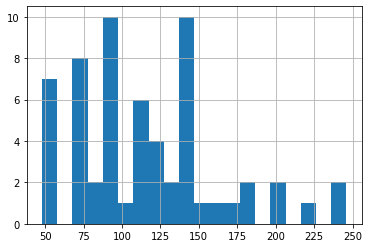

In [19]:
## Thống kê số tuổi tác giả
df['Tuoi'].hist(bins=20)

- Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất theo ký tự: 

In [20]:
max = len(df['Quote'][0])
min = len(df['Quote'][0])
max_list = []
min_list = []
for i in range(len(df['Tacgia'])):
  k = i + 1
  for k in range(len(df['Tacgia'])):
    if (len(df['Quote'][k]) > max):
      max = len(df['Quote'][k])
    if (len(df['Quote'][k]) < min):
      min = len(df['Quote'][k])


for i in range(len(df['Tacgia'])):
  if (len(df['Quote'][i]) == max):
    max_list.append(i)
  if (len(df['Quote'][i]) == min):
    min_list.append(i)


print('Câu dài nhất: ')
for i in max_list:
  print('\t' + df['Quote'][i])
  print('\tBy: ' + df['Tacgia'][i])
  print('\tLen: ', max)

print('\nCâu ngắn nhất: ')
for i in min_list:
  print('\t' + df['Quote'][i])
  print('\tBy: ' + df['Tacgia'][i])
  print('\tLen: ', min)
  print('\t---')
  

Câu dài nhất: 
	This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and mo

- Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất theo từ.

In [21]:
maxQuotes = 0
# df['Quote'][0]
index=0
for i in range(len(df['Quote'])):
  if (maxQuotes < len(df['Quote'][i].split())):
    maxQuotes = len(df['Quote'][i].split())
    index = i
print('Câu có độ dài dài nhất là: ',maxQuotes)
df.loc[index]

Câu có độ dài dài nhất là:  201


Tacgia                                        Marilyn Monroe
Link       https://quotes.toscrape.com/author/Marilyn-Mon...
Namsinh                                  1926-06-01 00:00:00
Quote      This life is what you make it. No matter what,...
Tuoi                                                      95
Name: 10, dtype: object

In [22]:
minQuotes = len(df['Quote'][0].split())
# df['Quote'][0]
index=0
for i in range(len(df['Quote'])):
  if ( len(df['Quote'][i].split())<minQuotes):
    minQuotes = len(df['Quote'][i].split())
    index = i
print('Câu có độ dài ngắn nhất là: ',minQuotes)
df.loc[index]

Câu có độ dài ngắn nhất là:  7


Tacgia                                     William Nicholson
Link       https://quotes.toscrape.com/author/William-Nic...
Namsinh                                  1948-01-12 00:00:00
Quote                       We read to know we're not alone.
Tuoi                                                      73
Name: 36, dtype: object

- Thống kê về các từ được sử dụng trong các câu nói và tần suất xuất hiện của từng từ

In [23]:
from collections import Counter

list_word_first = []
list_word = []

for i in range(len(df['Quote'])):
  list_word_first.append(df['Quote'][i].split())

# list_word_first.append(df['Quote'][0].split())
# list_word_first.append(df['Quote'][1].split())

for i in list_word_first:
  for j in i:
    if j =='-':
      continue
    if j.isnumeric():
      list_word.append(str(j))
      continue
    m=j
    m=m.replace(".","")
    m=m.replace(",","")
    m=m.replace("?","")
    m=m.replace(";","")
    m=m.replace(":","")
    temp = m.lower()
    list_word.append(temp)

# print(list_word)
print(f'{"Word":35} {"Số lần xuất hiện":35}\n')
list_word=sorted(list_word, key=str.lower)
count = Counter(list_word)
list_num =[]
list_word_notDuplicate=[]

for y in count:
  list_num.append(count[y])
  list_word_notDuplicate.append(y)
  print (f'{y:35} {count[y]}')


Word                                Số lần xuất hiện                   

10000                               1
a                                   42
abilities                           1
about                               5
absolutely                          2
act                                 1
actually                            1
admit                               1
adventure                           1
again                               1
alive                               1
all                                 4
alone                               1
also                                2
always                              4
am                                  3
an                                  1
analyze                             1
and                                 20
angel                               1
angry                               1
another                             1
any                                 2
anyone                              1
anything     

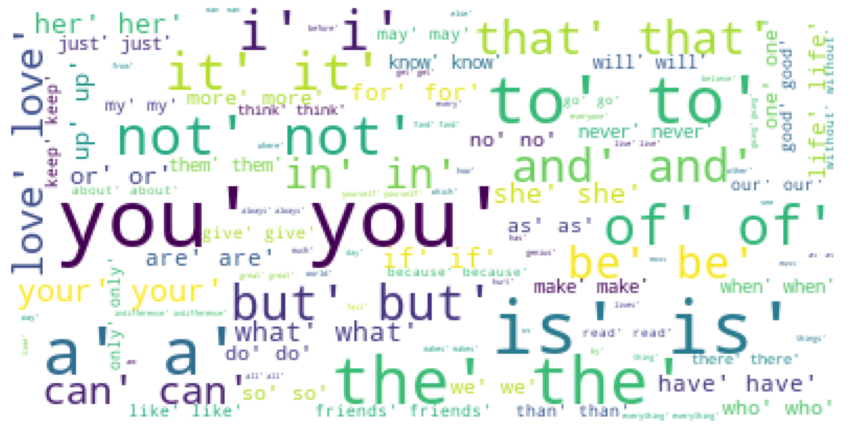

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=40,)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

draw_wordcloud(list_word)

2.3. Trích xuất đặc trưng- Feature Extraction (5 điểm):

Hãy đề xuất cách trích xuất đặc trưng từ bộ dữ liệu đã cho, cung cấp lý do và giải thích cách làm của bạn. 

In [25]:
df3 = pd.DataFrame()

for i in list_word_notDuplicate:
  df3[i]=0
df3

,10000,a,abilities,about,absolutely,act,actually,admit,adventure,again,alive,all,alone,also,always,am,an,analyze,and,angel,angry,another,any,anyone,anything,anyway,are,aren't,art,as,asleep,at,baby,bag,balance,battle,be,beautiful,beauty,because,...,upon,us,value,wakes,want,war,water,way,ways,we,we're,well,well-organized,were,what,when,where,which,while,who,whole,why,will,wise,with,without,woman,won't,work,world,worth,would,year,you,you'll,you're,youer,your,yourself,z


In [26]:
for m in range(len(df['Quote'])):
  array = df['Quote'][m].split()
  array_after= []

  for word in array:
    if word =='-':
      continue
    if word.isnumeric():
      array_after.append(str(word))
      continue
    m=word
    m=m.replace(".","")
    m=m.replace(",","")
    m=m.replace("?","")
    m=m.replace(";","")
    m=m.replace(":","")
    temp = m.lower()
    array_after.append(temp)
  count = Counter(array_after)

  array_add = []

  # print(len(array_add))
  for i in range(len(list_word_notDuplicate)):
    max = 0
    for y in count:
      if (y == list_word_notDuplicate[i]):
        # print(y)
        if max < count[y]:
          max = count[y]
    array_add.append(max)
  df3.loc[len(df3.index)] = array_add

df3



,10000,a,abilities,about,absolutely,act,actually,admit,adventure,again,alive,all,alone,also,always,am,an,analyze,and,angel,angry,another,any,anyone,anything,anyway,are,aren't,art,as,asleep,at,baby,bag,balance,battle,be,beautiful,beauty,because,...,upon,us,value,wakes,want,war,water,way,ways,we,we're,well,well-organized,were,what,when,where,which,while,who,whole,why,will,wise,with,without,woman,won't,work,world,worth,would,year,you,you'll,you're,youer,your,yourself,z
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
df3['Tacgia']=df['Tacgia']

In [28]:
df3

,10000,a,abilities,about,absolutely,act,actually,admit,adventure,again,alive,all,alone,also,always,am,an,analyze,and,angel,angry,another,any,anyone,anything,anyway,are,aren't,art,as,asleep,at,baby,bag,balance,battle,be,beautiful,beauty,because,...,us,value,wakes,want,war,water,way,ways,we,we're,well,well-organized,were,what,when,where,which,while,who,whole,why,will,wise,with,without,woman,won't,work,world,worth,would,year,you,you'll,you're,youer,your,yourself,z,Tacgia
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Albert Einstein
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,J.K. Rowling
2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Albert Einstein
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Jane Austen
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Marilyn Monroe
5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Albert Einstein
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,André Gide
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Thomas A. Edison
8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Eleanor Roosevelt
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Steve Martin


2.4. Suy luận (25 điểm):

Bạn được yêu cầu phân loại câu nói theo tên người nổi tiếng và tính độ tương đồng phong cách nói giữa các tác giả theo 2 yêu cầu sau:

- Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train Test và các độ đo phù hợp? (15 điểm)

In [29]:
X = df3.values[:,:-1]
y = df3.values[:,-1]
print(X)
print(y)

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 2 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]]
['Albert Einstein' 'J.K. Rowling' 'Albert Einstein' 'Jane Austen'
 'Marilyn Monroe' 'Albert Einstein' 'André Gide' 'Thomas A. Edison'
 'Eleanor Roosevelt' 'Steve Martin' 'Marilyn Monroe' 'J.K. Rowling'
 'Albert Einstein' 'Bob Marley' 'Dr. Seuss' 'Douglas Adams' 'Elie Wiesel'
 'Friedrich Nietzsche' 'Mark Twain' 'Allen Saunders' 'Pablo Neruda'
 'Ralph Waldo Emerson' 'Mother Teresa' 'Garrison Keillor' 'Jim Henson'
 'Dr. Seuss' 'Albert Einstein' 'J.K. Rowling' 'Albert Einstein'
 'Bob Marley' 'Dr. Seuss' 'J.K. Rowling' 'Bob Marley' 'Mother Teresa'
 'J.K. Rowling' 'Charles M. Schulz' 'William Nicholson' 'Albert Einstein'
 'Jorge Luis Borges' 'George Eliot' 'George R.R. Martin' 'C.S. Lewis'
 'Marilyn Monroe' 'Marilyn Monroe' 'Albert Einstein' 'Marilyn Monroe'
 'Marilyn Monroe' 'Martin Luther King Jr.' 'J.K. Rowling' 'James Baldwin'
 'Jane Austen' 'Eleanor Roosevelt' 'Marilyn

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = encoder.fit_transform(X[:,i])
print(X)

[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 2 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]]


In [31]:
ySvm=y.ravel()
print(ySvm.shape)
print(ySvm[:10])

(60,)
['Albert Einstein' 'J.K. Rowling' 'Albert Einstein' 'Jane Austen'
 'Marilyn Monroe' 'Albert Einstein' 'André Gide' 'Thomas A. Edison'
 'Eleanor Roosevelt' 'Steve Martin']


In [32]:
from sklearn.model_selection import train_test_split
X_train_Svm, X_test_Svm, y_train_Svm, y_test_Svm = train_test_split(\
    X, ySvm, test_size=0.2, random_state=42)

print('Train:')
print(X_train_Svm.shape)
print(y_train_Svm.shape)
print('Test:')
print(X_test_Svm.shape)
print(y_test_Svm.shape)

Train:
(48, 461)
(48,)
Test:
(12, 461)
(12,)


In [33]:
from sklearn import svm 
model_Svm = svm.SVC(kernel='linear',gamma=0.01, C=100.)
model_Svm.fit(X_train_Svm,y_train_Svm)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_pred_Svm = model_Svm.predict(X_test_Svm)

In [35]:
print(f'{"Tangia":40} {"Predict":40}\n')
for i in range(len(y_test_Svm)):
    print (f'{y_test_Svm[i]:40} {y_pred_Svm[i]}')

Tangia                                   Predict                                 

Albert Einstein                          J.K. Rowling
Albert Einstein                          Albert Einstein
William Nicholson                        Albert Einstein
Marilyn Monroe                           Albert Einstein
Bob Marley                               Marilyn Monroe
Haruki Murakami                          Albert Einstein
Mother Teresa                            J.K. Rowling
J.K. Rowling                             J.K. Rowling
Albert Einstein                          Albert Einstein
Ernest Hemingway                         Albert Einstein
Marilyn Monroe                           Charles M. Schulz
Jane Austen                              J.K. Rowling


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_Svm,y_pred_Svm))

                   precision    recall  f1-score   support

  Albert Einstein       0.33      0.67      0.44         3
       Bob Marley       0.00      0.00      0.00         1
Charles M. Schulz       0.00      0.00      0.00         0
 Ernest Hemingway       0.00      0.00      0.00         1
  Haruki Murakami       0.00      0.00      0.00         1
     J.K. Rowling       0.25      1.00      0.40         1
      Jane Austen       0.00      0.00      0.00         1
   Marilyn Monroe       0.00      0.00      0.00         2
    Mother Teresa       0.00      0.00      0.00         1
William Nicholson       0.00      0.00      0.00         1

         accuracy                           0.25        12
        macro avg       0.06      0.17      0.08        12
     weighted avg       0.10      0.25      0.14        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất? (10 điểm)

In [37]:
import math
df4 = pd.DataFrame()
df4 = df3.T
df4.columns = df4.iloc[-1]
df4


Tacgia,Albert Einstein,J.K. Rowling,Albert Einstein,Jane Austen,Marilyn Monroe,Albert Einstein,André Gide,Thomas A. Edison,Eleanor Roosevelt,Steve Martin,Marilyn Monroe,J.K. Rowling,Albert Einstein,Bob Marley,Dr. Seuss,Douglas Adams,Elie Wiesel,Friedrich Nietzsche,Mark Twain,Allen Saunders,Pablo Neruda,Ralph Waldo Emerson,Mother Teresa,Garrison Keillor,Jim Henson,Dr. Seuss,Albert Einstein,J.K. Rowling,Albert Einstein,Bob Marley,Dr. Seuss,J.K. Rowling,Bob Marley,Mother Teresa,J.K. Rowling,Charles M. Schulz,William Nicholson,Albert Einstein,Jorge Luis Borges,George Eliot,George R.R. Martin,C.S. Lewis,Marilyn Monroe,Marilyn Monroe,Albert Einstein,Marilyn Monroe,Marilyn Monroe,Martin Luther King Jr.,J.K. Rowling,James Baldwin,Jane Austen,Eleanor Roosevelt,Marilyn Monroe,Albert Einstein,Haruki Murakami,Alexandre Dumas fils,Stephenie Meyer,Ernest Hemingway,Helen Keller,George Bernard Shaw
10000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a,1,0,2,1,0,2,0,0,2,1,2,1,1,1,1,0,0,2,1,0,0,0,0,3,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,1,0,1,0,0,3,0,0,2,2,0,0,1,1,0,0
abilities,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
about,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
your,0,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yourself,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
z,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df4=df4[:-1]
df4


Tacgia,Albert Einstein,J.K. Rowling,Albert Einstein,Jane Austen,Marilyn Monroe,Albert Einstein,André Gide,Thomas A. Edison,Eleanor Roosevelt,Steve Martin,Marilyn Monroe,J.K. Rowling,Albert Einstein,Bob Marley,Dr. Seuss,Douglas Adams,Elie Wiesel,Friedrich Nietzsche,Mark Twain,Allen Saunders,Pablo Neruda,Ralph Waldo Emerson,Mother Teresa,Garrison Keillor,Jim Henson,Dr. Seuss,Albert Einstein,J.K. Rowling,Albert Einstein,Bob Marley,Dr. Seuss,J.K. Rowling,Bob Marley,Mother Teresa,J.K. Rowling,Charles M. Schulz,William Nicholson,Albert Einstein,Jorge Luis Borges,George Eliot,George R.R. Martin,C.S. Lewis,Marilyn Monroe,Marilyn Monroe,Albert Einstein,Marilyn Monroe,Marilyn Monroe,Martin Luther King Jr.,J.K. Rowling,James Baldwin,Jane Austen,Eleanor Roosevelt,Marilyn Monroe,Albert Einstein,Haruki Murakami,Alexandre Dumas fils,Stephenie Meyer,Ernest Hemingway,Helen Keller,George Bernard Shaw
10000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a,1,0,2,1,0,2,0,0,2,1,2,1,1,1,1,0,0,2,1,0,0,0,0,3,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,2,2,0,1,1,0,1,0,0,3,0,0,2,2,0,0,1,1,0,0
abilities,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
about,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you're,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
youer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
your,0,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yourself,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [39]:
df4=pd.DataFrame(np.where(df4==1, df4.columns, np.nan))
# for tacgia in df4:
#   for i in range(len(df4[tacgia])):
#     if i != 0:
#       # print(i)
#       df4.loc[i,tacgia] = tacgia
#     else:
#       df4.loc[i,tacgia] = math.nan
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thomas A. Edison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albert Einstein,NaN,NaN,Jane Austen,NaN,NaN,NaN,NaN,NaN,Steve Martin,NaN,J.K. Rowling,Albert Einstein,Bob Marley,Dr. Seuss,NaN,NaN,NaN,Mark Twain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albert Einstein,NaN,NaN,NaN,NaN,NaN,NaN,Charles M. Schulz,NaN,NaN,Jorge Luis Borges,NaN,NaN,NaN,NaN,Marilyn Monroe,Albert Einstein,NaN,Marilyn Monroe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stephenie Meyer,Ernest Hemingway,NaN,NaN
2,NaN,J.K. Rowling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marilyn Monroe,NaN,NaN,Bob Marley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bob Marley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dr. Seuss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,NaN,NaN,Albert Einstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albert Einstein,NaN,NaN,NaN,NaN,J.K. Rowling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albert Einstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marilyn Monroe,NaN,Albert Einstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marilyn Monroe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
list_data = []
for a in df4.values.tolist():
  temp=[]
  for b in a:
    if (pd.notna(b)):
      temp.append(b)
  list_data.append(temp)
list_data


[['Thomas A. Edison'],
 ['Albert Einstein',
  'Jane Austen',
  'Steve Martin',
  'J.K. Rowling',
  'Albert Einstein',
  'Bob Marley',
  'Dr. Seuss',
  'Mark Twain',
  'Albert Einstein',
  'Charles M. Schulz',
  'Jorge Luis Borges',
  'Marilyn Monroe',
  'Albert Einstein',
  'Marilyn Monroe',
  'Stephenie Meyer',
  'Ernest Hemingway'],
 ['J.K. Rowling'],
 ['Marilyn Monroe', 'Bob Marley', 'Bob Marley'],
 [],
 ['Marilyn Monroe'],
 ['Marilyn Monroe'],
 ['Bob Marley'],
 ['J.K. Rowling'],
 ['Bob Marley'],
 ['Dr. Seuss'],
 ['Marilyn Monroe', 'J.K. Rowling', 'Mother Teresa', 'Charles M. Schulz'],
 ['William Nicholson'],
 ['Marilyn Monroe', 'Garrison Keillor'],
 ['Jorge Luis Borges'],
 [],
 ['Marilyn Monroe'],
 ['Bob Marley'],
 ['Marilyn Monroe',
  'Elie Wiesel',
  'Mark Twain',
  'Jim Henson',
  'Charles M. Schulz',
  'Marilyn Monroe',
  'James Baldwin',
  'Alexandre Dumas fils'],
 ['Marilyn Monroe'],
 ['Ralph Waldo Emerson'],
 ['Helen Keller'],
 ['Pablo Neruda', 'Albert Einstein'],
 ['Garriso

In [ ]:
!pip install mlxtend

In [41]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(list_data).transform(list_data)
df5 = pd.DataFrame(te_ary, columns=te.columns_)
df5

,Albert Einstein,Alexandre Dumas fils,Allen Saunders,André Gide,Bob Marley,C.S. Lewis,Charles M. Schulz,Douglas Adams,Dr. Seuss,Eleanor Roosevelt,Elie Wiesel,Ernest Hemingway,Friedrich Nietzsche,Garrison Keillor,George Bernard Shaw,George Eliot,George R.R. Martin,Haruki Murakami,Helen Keller,J.K. Rowling,James Baldwin,Jane Austen,Jim Henson,Jorge Luis Borges,Marilyn Monroe,Mark Twain,Martin Luther King Jr.,Mother Teresa,Pablo Neruda,Ralph Waldo Emerson,Stephenie Meyer,Steve Martin,Thomas A. Edison,William Nicholson
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
458,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
459,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 7.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [44]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth


frequent_itemsets = fpgrowth(df5, min_support=0.03, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules[['antecedents', 'consequents', 'confidence']]


,antecedents,consequents,confidence
0,(Bob Marley),(Marilyn Monroe),0.253165
1,(Marilyn Monroe),(Bob Marley),0.155039
2,(Albert Einstein),(Marilyn Monroe),0.228571
3,(Marilyn Monroe),(Albert Einstein),0.124031
4,(J.K. Rowling),(Marilyn Monroe),0.279412
5,(Marilyn Monroe),(J.K. Rowling),0.147287
